In [1]:
# importing libraries

import matplotlib.pyplot as plt
import csv

In [2]:
network_throughput_values_pol = []
network_throughput_values_eth = []

ganache_throughput_values = []

ganache_speculated_values_eth = []
ganache_speculated_values_pol = []

ratio_eth = 0.0
ratio_pol = 0.0


In [3]:
def calculate_average_network_values() -> float:
    with open("./throughput.csv") as f:
        data = csv.reader(f, delimiter=',')
        for dataval in data:
            if(dataval[1] != 'time'):
                ganache_throughput_values.append(float(dataval[1]))
    with open("../Analyse-Networks/main_polygon.csv") as f:
        data = csv.reader(f, delimiter=',')
        for dataval in data:
            if(dataval[0] == "GetSelfKeys"):
                network_throughput_values_pol.append(float(dataval[1]))
    with open("../Analyse-Networks/main_ethereum.csv") as f:
        data = csv.reader(f, delimiter=',')
        for dataval in data:
            if(dataval[0] == "GetSelfKeys"):
                network_throughput_values_eth.append(float(dataval[1]))
    ratio_eth = sum(network_throughput_values_eth)/sum(ganache_throughput_values)
    ratio_pol = sum(network_throughput_values_pol)/sum(ganache_throughput_values)
    return ratio_eth*10,ratio_pol

ratio_eth,ratio_pol = calculate_average_network_values()


print("Network Throughput Values (ETH) : ", network_throughput_values_eth)
print("Network Throughput Values (POL) : ", network_throughput_values_pol)

print("Ganache Throughput Values : ",ganache_throughput_values)
print("Needed Ratio (ETH) : ", ratio_eth)
print("Needed Ratio (POL) : ", ratio_pol)

Network Throughput Values (ETH) :  [114.27856993675232, 47.17865705490112, 15.003321170806885, 150.00332117080688, 150.00332117080688]
Network Throughput Values (POL) :  [21.020720958709717, 8.806632995605469, 14.220090866088867, 15.574299812316895, 12.664725065231323]
Ganache Throughput Values :  [0.40123891830444336, 0.6677430152893067, 2.8090786933898926, 3.4592113494873047, 4.572136402130127]
Needed Ratio (ETH) :  400.07628872664606
Needed Ratio (POL) :  6.069694429812081


In [4]:
def calculate_speculated_values():
    for val in ganache_throughput_values:
        ganache_speculated_values_eth.append(val*ratio_eth)
    for val in ganache_throughput_values:
        ganache_speculated_values_pol.append(val*ratio_pol)

calculate_speculated_values()

print("Ganache Speculated Values (ETH) :", ganache_speculated_values_eth)
print("Ganache Speculated Values (POL) :", ganache_speculated_values_pol)

Ganache Speculated Values (ETH) : [160.52617732793564, 267.1481473800859, 1123.8457783925244, 1383.9484386239737, 1829.2033633162214]
Ganache Speculated Values (POL) : [2.4353976274563047, 4.052996060447428, 17.05024929817243, 20.996355859525824, 27.75147085235028]


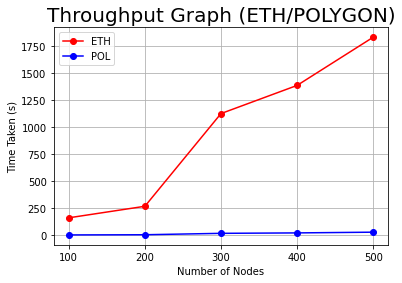

In [5]:
throughput_y_axis_eth = ganache_speculated_values_eth
throughput_y_axis_pol = ganache_speculated_values_pol
throughput_x_axis = ['100','200','300','400','500']

# Throughput Graph
plt.plot(throughput_x_axis, throughput_y_axis_eth,
         color="r", linestyle="solid", marker='o', label="ETH")
plt.plot(throughput_x_axis, throughput_y_axis_pol,
         color="b", linestyle="solid", marker='o', label="POL")
plt.ylabel('Time Taken (s)')
plt.xlabel('Number of Nodes')
plt.title("Throughput Graph (ETH/POLYGON)", fontsize=20)
plt.grid()
plt.legend()
plt.show()
